# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import datasets, linear_model

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()  

In [ ]:
print(diabetes.keys())
print("X shape:", diabetes.data.shape)   
print("y shape:", diabetes.target.shape) 
print("Features:", diabetes.feature_names)


dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
X shape: (442, 10)
y shape: (442,)
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
out = (
    "{'data': " + arr_preview(diabetes.data) + ",\n"
    " 'target': " + arr1d_preview(diabetes.target) + ",\n"
    " 'frame': None,\n"
    " 'DESCR': " + repr(diabetes.DESCR) + ",\n"
    " 'feature_names': " + repr(diabetes.feature_names) + ",\n"
    " 'data_filename': " + repr(getattr(diabetes, 'data_filename', 'diabetes_data_raw.csv.gz')) + ",\n"
    " 'target_filename': " + repr(getattr(diabetes, 'target_filename', 'diabetes_target.csv.gz')) + ",\n"
    " 'data_module': " + repr(getattr(diabetes, 'data_module', 'sklearn.datasets.data')) + "}")

print(out)


{'data': array([[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]], shape=(442, 10)),
 'target': [151.  75. 141. 206. 135.  97. ...  48. 178. 104. 132. 220.  57.],
 'frame': None,
 'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [ ]:
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

¿Cuántos atributos hay y qué significan?




Hay 10 atributos (features), todos numéricos y estandarizados:


age: edad (años)


sex: sexo


bmi: índice de masa corporal


bp: presión arterial media


s1: colesterol sérico total (tc)


s2: LDL (lipoproteínas de baja densidad)


s3: HDL (lipoproteínas de alta densidad)


s4: relación colesterol total / HDL (tch)


s5: posiblemente logaritmo de triglicéridos séricos (ltg)


s6: glucosa (glu)






Relación entre diabetes['data'] y diabetes['target']




diabetes['data'] contiene las 10 variables predictoras (X).


diabetes['target'] es la variable objetivo (y): una medida cuantitativa de la progresión de la enfermedad un año después del inicio (baseline). En problemas de regresión, modelamos target a partir de data.




¿Cuántos registros hay?




442 pacientes (filas).


Por tanto, diabetes['data'] tiene forma (442, 10) y diabetes['target'] tiene 442 valores.





In [ ]:

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target

pd.set_option("display.float_format", "{:.6f}".format) #6decs

df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.000000
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.000000
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.000000
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.000000
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.000000
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.000000
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.000000
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.000000
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.000000


 Número de atributos (features) 

In [ ]:
print(len(diabetes.feature_names))

El RangeIndex 

In [ ]:
print(df.index)   

In [ ]:
print(df.shape[0])  

10
RangeIndex(start=0, stop=442, step=1)
442


#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [ ]:
X = diabetes.data      
y = diabetes.target    

Asigna las variables de entrada y la variable objetivo del dataset de diabetes

In [ ]:

print("X shape:", X.shape)
print("y shape:", y.shape)  

print("n_samples (X) =", X.shape[0], " | n_features =", X.shape[1])
print("n_samples (y) =", y.shape[0])
print("Same number of samples in X and y?", X.shape[0] == y.shape[0])

print("Matches docs shapes?", X.shape == (442, 10) and y.shape == (442,))


X shape: (442, 10)
y shape: (442,)
n_samples (X) = 442  | n_features = 10
n_samples (y) = 442
Same number of samples in X and y? True
Matches docs shapes? True


In [ ]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target

df = df.astype({col: "float64" for col in df.columns})

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:

desc = df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


 Matriz de correlación

In [ ]:
corr = df.corr(numeric_only=True)

Heatmap

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
im = ax.imshow(corr.values, vmin=-1, vmax=1, cmap="coolwarm")


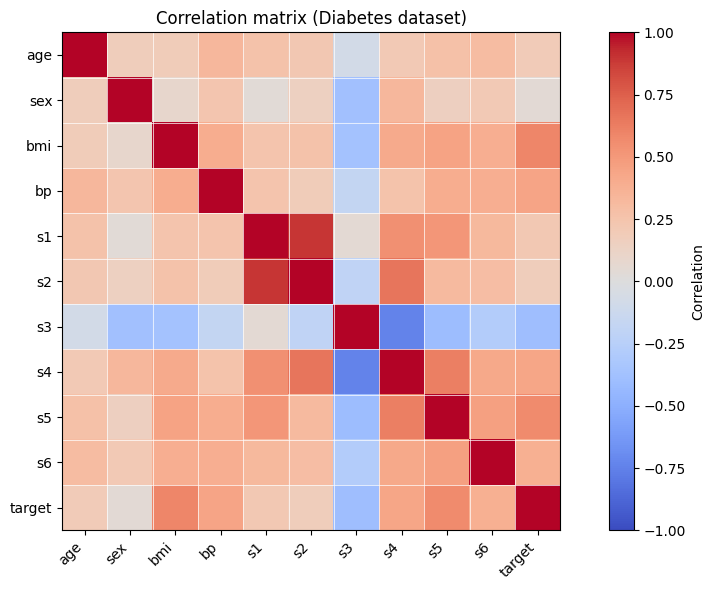

In [ ]:
ax.set_xticks(np.arange(corr.shape[1]))
ax.set_yticks(np.arange(corr.shape[0]))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticklabels(corr.index)

ax.set_xticks(np.arange(-.5, corr.shape[1], 1), minor=True)
ax.set_yticks(np.arange(-.5, corr.shape[0], 1), minor=True)
ax.grid(which="minor", color="w", linewidth=0.5)
ax.tick_params(which="minor", bottom=False, left=False)

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Correlation", rotation=90)

ax.set_title("Correlation matrix (Diabetes dataset)")
plt.tight_layout()
plt.show()


#  Histograma 

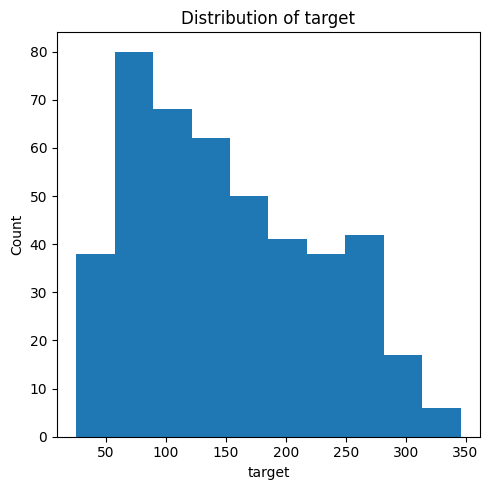

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.hist(y, bins=10) 
ax.set_xlabel("target")
ax.set_ylabel("Count")
ax.set_title("Distribution of target")
plt.tight_layout()
plt.show()


Scatter: bmi (columna 2) vs target

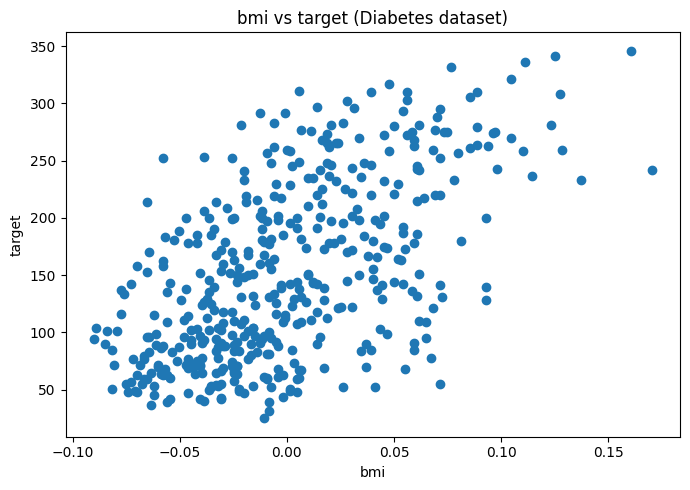

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X[:, 2], y)  
plt.xlabel("bmi")
plt.ylabel("target")
plt.title("bmi vs target (Diabetes dataset)")
plt.tight_layout()
plt.show()


## Building a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [1]:
from sklearn import linear_model


#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

# Usa  20  como test 


In [ ]:
diabetes = datasets.load_diabetes()

X, y = diabetes.data, diabetes.target
diabetes_model = linear_model.LinearRegression()

In [ ]:
# Split por slicing: todo menos los 20 últimos para entrenar; últimos 20 para test
diabetes_data_train, diabetes_target_train = X[:-20], y[:-20]
diabetes_data_test,  diabetes_target_test  = X[-20:],  y[-20:]

entrenar y predecir

In [ ]:
diabetes_model.fit(diabetes_data_train, diabetes_target_train)
y_pred = diabetes_model.predict(diabetes_data_test)

In [6]:
diabetes_model = linear_model.LinearRegression()
X, y = diabetes.data, diabetes.target

diabetes_data_train   = X[:-20]
diabetes_target_train = y[:-20]
diabetes_data_test    = X[-20:]
diabetes_target_test  = y[-20:]

In [7]:
print(diabetes_data_train.shape, diabetes_target_train.shape) 
print(diabetes_data_test.shape,  diabetes_target_test.shape)   


(422, 10) (422,)
(20, 10) (20,)


Perform a brief exploratory analysis to investigate the conditions necessary for linear regression. This analysis will help you understand the distribution of the target variable and its correlations with other features.

DISTRIBUCION TARGET

In [ ]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
ax.hist(df["target"], bins=10)
ax.set_xlabel("target")
ax.set_ylabel("Count")
ax.set_title("Distribution of target")
plt.tight_layout()
plt.show()

CORR

In [ ]:
corr = df.corr(numeric_only=True)
target_corr = corr["target"].sort_values(ascending=False)
print("\nCorrelation with target (descending):\n", target_corr.to_string())

MAPAHEAT

In [ ]:
fig, ax = plt.subplots(figsize=(10,6), dpi=100)
im = ax.imshow(corr.values, vmin=-1, vmax=1, cmap="coolwarm")
ax.set_xticks(np.arange(corr.shape[1]))
ax.set_yticks(np.arange(corr.shape[0]))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticklabels(corr.index)
ax.set_title("Correlation matrix")
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Correlation")
plt.tight_layout()
plt.show()


3 predictors

In [ ]:
top3 = target_corr.drop("target").abs().sort_values(ascending=False).index[:3].tolist()
fig, axes = plt.subplots(1, 3, figsize=(12,4), dpi=100)
for ax, col in zip(axes, top3):
    ax.scatter(df[col], df["target"])
    ax.set_xlabel(col)
    ax.set_ylabel("target")
    ax.set_title(f"{col} vs target")
plt.tight_layout()
plt.show()

Shape: (442, 11)

Target summary:
count   442.000000
mean    152.133484
std      77.093005
min      25.000000
25%      87.000000
50%     140.500000
75%     211.500000
max     346.000000


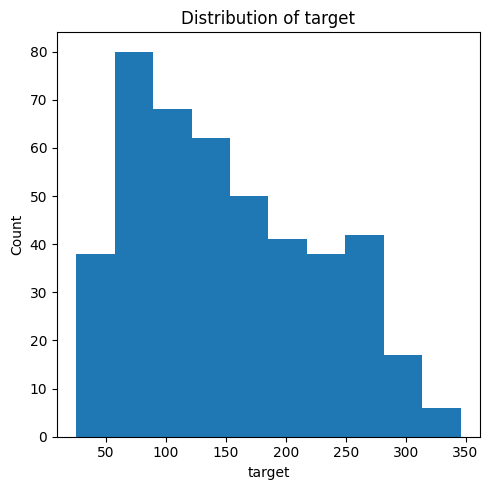


Correlation with target (descending):
 target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789


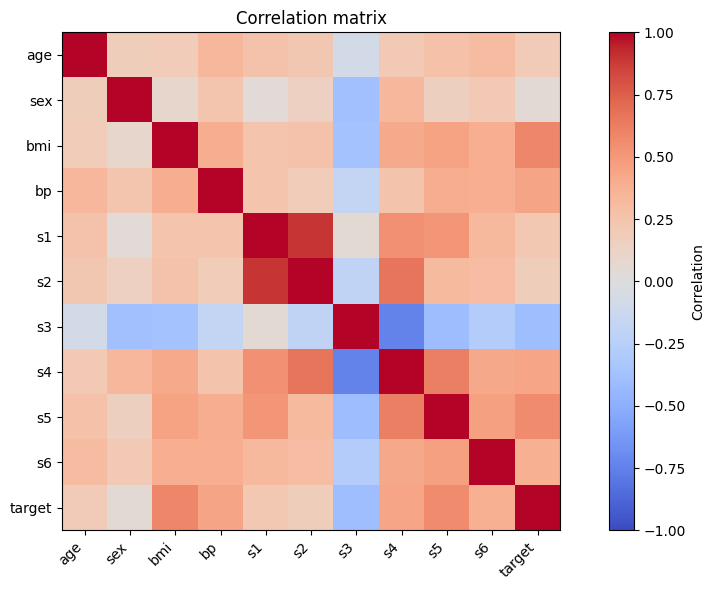

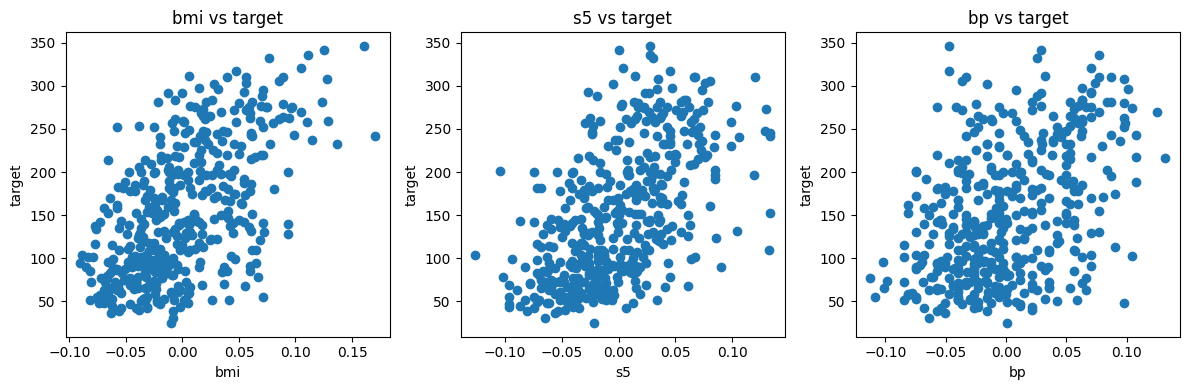


VIF not computed (statsmodels not available). To enable:
  %pip install statsmodels


In [ ]:
try:
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    X = df.drop(columns=["target"]).values
    vif = []
    for i, name in enumerate(d.feature_names):
        vif.append((name, variance_inflation_factor(X, i)))
    vif_df = pd.DataFrame(vif, columns=["feature", "VIF"]).sort_values("VIF", ascending=False)
    print("\nVariance Inflation Factors (VIF):\n", vif_df.to_string(index=False))



Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [ ]:
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

In [ ]:

print("Intercept (bias):", diabetes_model.intercept_)
print("Coefficients:", diabetes_model.coef_)

from sklearn.datasets import load_diabetes
feature_names = load_diabetes().feature_names
for name, coef in zip(feature_names, diabetes_model.coef_):
    print(f"{name:>4}: {coef:.6f}")


Intercept (bias): 152.76429169049118
Coefficients: [ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]
 age: 0.306094
 sex: -237.635570
 bmi: 510.538048
  bp: 327.729878
  s1: -814.111926
  s2: 492.799595
  s3: 102.841240
  s4: 184.603496
  s5: 743.509388
  s6: 76.096646


LinearRegression()

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

Predict y for the test set using the fitted model

In [ ]:
diabetes_target_pred = diabetes_model.predict(diabetes_data_test)

In [ ]:
print("Predictions shape:", diabetes_target_pred.shape)  
print("Predictions:", diabetes_target_pred)

import pandas as pd
pd.DataFrame({
    "y_true": diabetes_target_test,
    "y_pred": diabetes_target_pred
})


Predictions shape: (20,)
Predictions: [197.61898486 155.44031962 172.88875144 111.53270645 164.79397301
 131.06765869 259.12441219 100.47873746 117.06005372 124.30261597
 218.36868146  61.19581944 132.24837933 120.33293546  52.54513009
 194.03746764 102.5756431  123.56778709 211.03465323  52.60221696]


,y_true,y_pred
0,233.000000,197.618985
1,91.000000,155.440320
2,111.000000,172.888751
3,152.000000,111.532706
4,120.000000,164.793973
5,67.000000,131.067659
6,310.000000,259.124412
7,94.000000,100.478737
8,183.000000,117.060054
9,66.000000,124.302616


FIT

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

Predict 

In [ ]:
first_pred = np.float64(diabetes_model.predict(X_test)[0])
print(repr(first_pred)) 


np.float64(197.61898486167382)


In [ ]:
np.set_printoptions(precision=8, suppress=False)
print(model.coef_)


[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]


y = a + b*x1 + c*x2 + d*x3 + ....

In [ ]:
feature_names = load_diabetes().feature_names

intercept = diabetes_model.intercept_
coefs = diabetes_model.coef_


In [ ]:
eq = f"y = {intercept:.8f}"
for name, coef in zip(feature_names, coefs):
    sign = " + " if coef >= 0 else " - "
    eq += f"{sign}{abs(coef):.8f}*{name}"
print(eq)




y = 152.76429169 + 0.30609425*age - 237.63557011*sex + 510.53804765*bmi + 327.72987799*bp - 814.11192635*s1 + 492.79959450*s2 + 102.84123997*s3 + 184.60349609*s4 + 743.50938760*s5 + 76.09664637*s6

LaTeX:
 y = 152.76429169 + 0.30609425\times age - 237.63557011\times sex + 510.53804765\times bmi + 327.72987799\times bp - 814.11192635\times s1 + 492.79959450\times s2 + 102.84123997\times s3 + 184.60349609\times s4 + 743.50938760\times s5 + 76.09664637\times s6


Ecuación en LaTeX ####

In [ ]:
latex = r"y = " + f"{intercept:.8f}"
for name, coef in zip(feature_names, coefs):
    sign = " + " if coef >= 0 else " - "
    latex += f"{sign}{abs(coef):.8f}\\times {name}"
print("\nLaTeX:\n", latex)

In [ ]:
np.set_printoptions(precision=8, suppress=False)
print(y_pred)



[197.61898486 155.44031962 172.88875144 111.53270645 164.79397301
 131.06765869 259.12441219 100.47873746 117.06005372 124.30261597
 218.36868146  61.19581944 132.24837933 120.33293546  52.54513009
 194.03746764 102.5756431  123.56778709 211.03465323  52.60221696]


#### Print your `diabetes_target_test` and compare with the prediction. 

In [ ]:

print("diabetes_target_test:")
print(np.array(diabetes_target_test))

diabetes_target_pred = diabetes_model.predict(diabetes_data_test)
print("\npredictions:")
print(np.array(diabetes_target_pred))

# Side-by-side comparison (all 20 rows)
comparison = pd.DataFrame({
    "y_true": diabetes_target_test,
    "y_pred": diabetes_target_pred,
    "error": diabetes_target_pred - diabetes_target_test
})
print("\nComparison (y_true vs y_pred):")
print(comparison.to_string(index=False))

print("\nR^2:", r2_score(diabetes_target_test, diabetes_target_pred))
print("MAE:", mean_absolute_error(diabetes_target_test, diabetes_target_pred))


diabetes_target_test:
[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]

predictions:
[197.61898486 155.44031962 172.88875144 111.53270645 164.79397301
 131.06765869 259.12441219 100.47873746 117.06005372 124.30261597
 218.36868146  61.19581944 132.24837933 120.33293546  52.54513009
 194.03746764 102.5756431  123.56778709 211.03465323  52.60221696]

Comparison (y_true vs y_pred):
    y_true     y_pred      error
233.000000 197.618985 -35.381015
 91.000000 155.440320  64.440320
111.000000 172.888751  61.888751
152.000000 111.532706 -40.467294
120.000000 164.793973  44.793973
 67.000000 131.067659  64.067659
310.000000 259.124412 -50.875588
 94.000000 100.478737   6.478737
183.000000 117.060054 -65.939946
 66.000000 124.302616  58.302616
173.000000 218.368681  45.368681
 72.000000  61.195819 -10.804181
 49.000000 132.248379  83.248379
 64.000000 120.332935  56.332935
 48.000000  52.545130   4.545130
178.000000 194.037468  16.037468
104

In [ ]:
d = load_diabetes()
X, y = d.data, d.target
X_train, y_train = X[:-20], y[:-20]
X_test , y_test  = X[-20:],  y[-20:]

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

residuals = y_pred - y_test
res_series = pd.Series(residuals, index=pd.RangeIndex(start=422, stop=442), name="target")

print(res_series)


422   -35.381015
423    64.440320
424    61.888751
425   -40.467294
426    44.793973
427    64.067659
428   -50.875588
429     6.478737
430   -65.939946
431    58.302616
432    45.368681
433   -10.804181
434    83.248379
435    56.332935
436     4.545130
437    16.037468
438    -1.424357
439    -8.432213
440    -8.965347
441    -4.397783
Name: target, dtype: float64


#### Is `diabetes_target_test` exactly the same as the model prediction? Use different error metrics

In [ ]:
d = load_diabetes()
X, y = d.data, d.target
X_train, y_train = X[:-20], y[:-20]
X_test , y_test  = X[-20:],  y[-20:]

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Exact equality (all elements equal)?", np.array_equal(y_test, y_pred))
print("Close within tol (rtol=1e-7, atol=1e-8)?", np.allclose(y_test, y_pred, rtol=1e-7, atol=1e-8))


In [ ]:
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mdae = median_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)
evs  = explained_variance_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  

In [ ]:

print("\nError metrics on test set:")
print(f"MAE  : {mae:.6f}")
print(f"MSE  : {mse:.6f}")
print(f"RMSE : {rmse:.6f}")
print(f"MdAE : {mdae:.6f}")
print(f"R^2  : {r2:.6f}")
print(f"EVS  : {evs:.6f}")
print(f"MAPE : {mape:.4f}%")



Exact equality (all elements equal)? False
Close within tol (rtol=1e-7, atol=1e-8)? False


TypeError: got an unexpected keyword argument 'squared'

In [ ]:
d = load_diabetes()
X, y = d.data, d.target
X_train, y_train = X[:-20], y[:-20]
X_test , y_test  = X[-20:],  y[-20:]

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test,  y_pred_test)

In [ ]:
print("R2 score train", r2_train)
print("R2 score test", r2_test)

R2 score train 0.5122247821066493
R2 score test 0.585085427447195


In [ ]:
d = load_diabetes()
X, y = d.data, d.target
X_train, y_train = X[:-20], y[:-20]
X_test , y_test  = X[-20:],  y[-20:]

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
residuals = y_pred - y_test

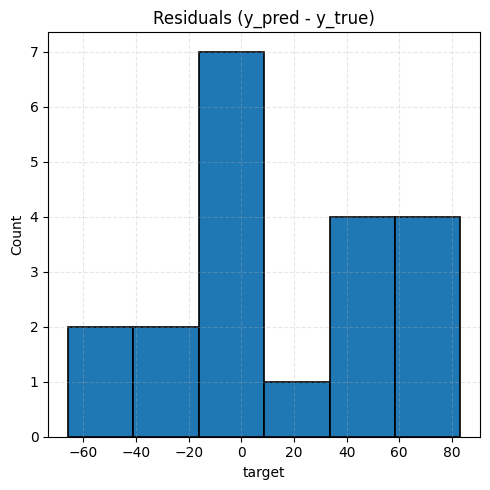

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(residuals, bins=6, edgecolor='black')
ax.set_xlabel("target")
ax.set_ylabel("Count")
ax.set_title("Residuals (y_pred - y_true)")
ax.grid(True, linestyle="--", alpha=0.3) 
plt.tight_layout()
plt.show()


In [ ]:
model = LinearRegression()
model.fit(df[:-20], y[:-20])


In [ ]:
y_pred = model.predict(X[-20:])   


[197.61898486 155.44031962 172.88875144]


c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
d = load_diabetes()
X, y = d.data, d.target
model = LinearRegression().fit(X[:-20], y[:-20])


In [ ]:
val = model.intercept_ + model.coef_.sum()
np.set_printoptions(precision=11, suppress=False)
print(np.array([val]))

[1539.44117964084]


#### Iterate with a new model to assess if any improvements can be made compared to the previous one. Consider reducing the number of variables or using `StandardScaler` to enhance model performance.

In [ ]:
d = load_diabetes()
X, y = d.data, d.target
feat_names = np.array(d.feature_names)
X_train, y_train = X[:-20], y[:-20]
X_test , y_test  = X[-20:],  y[-20:]

In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
def eval_model(name, model):
    model.fit(X_train, y_train)
    y_pred_tr = model.predict(X_train)
    y_pred_te = model.predict(X_test)
    out = {
        "model": name,
        "R2_train": r2_score(y_train, y_pred_tr),
        "R2_test":  r2_score(y_test,  y_pred_te),
        "MAE_test": mean_absolute_error(y_test, y_pred_te),
        "RMSE_test": rmse(y_test, y_pred_te),  # ← sin 'squared='}

results, models = [], {}

In [ ]:

# 1) OLS base
res, m = eval_model("LinearRegression (all features)", LinearRegression())
results.append(res); models[res["model"]] = m

# 2) Ridge + StandardScaler
ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("ridgecv", RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5))
])
res, m = eval_model("RidgeCV + StandardScaler", ridge)
results.append(res); models[res["model"]] = m

# 3) Lasso + StandardScaler
lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("lassocv", LassoCV(alphas=np.logspace(-3, 1, 50), cv=5, max_iter=10000, random_state=0))
])
res, m = eval_model("LassoCV + StandardScaler", lasso)
results.append(res); models[res["model"]] = m

# 4) SelectKBest + OLS
for k in [3, 5, 7, 10]:
    pipe = Pipeline([
        ("selectkbest", SelectKBest(score_func=f_regression, k=k)),
        ("ols", LinearRegression())
    ])
    res, m = eval_model(f"SelectKBest(k={k}) + OLS", pipe)
    results.append(res); models[res["model"]] = m

# 5) SelectKBest + StandardScaler + Ridge
for k in [5, 7, 10]:
    pipe = Pipeline([
        ("selectkbest", SelectKBest(score_func=f_regression, k=k)),
        ("scaler", StandardScaler()),
        ("ridgecv", RidgeCV(alphas=np.logspace(-3, 3, 50), cv=5))
    ])
    res, m = eval_model(f"SelectKBest(k={k}) + StandardScaler + RidgeCV", pipe)
    results.append(res); models[res["model"]] = m


df_res = pd.DataFrame(results).sort_values("R2_test", ascending=False)
pd.set_option("display.precision", 6)
print(df_res.to_string(index=False))


                                       model  R2_train  R2_test  MAE_test  RMSE_test     alpha                         features
                    LassoCV + StandardScaler  0.510949 0.588107 36.540468  44.608514  0.193070                              NaN
                    RidgeCV + StandardScaler  0.511504 0.585553 36.660570  44.746613  2.682696                              NaN
SelectKBest(k=10) + StandardScaler + RidgeCV  0.511504 0.585553 36.660570  44.746613  2.682696 age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
                     SelectKBest(k=10) + OLS  0.512225 0.585085 36.609619  44.771851       NaN age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
             LinearRegression (all features)  0.512225 0.585085 36.609619  44.771851       NaN                              NaN
                      SelectKBest(k=3) + OLS  0.473458 0.572616 38.374157  45.439612       NaN                        bmi,bp,s5
                      SelectKBest(k=5) + OLS  0.488078 0.565744 37.815226  45.803508       NaN          

In [ ]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(model.intercept_)            
pred = model.predict(X_test)[:2]
np.set_printoptions(precision=8, suppress=False)
print(pred)                        


152.76429169049118
[197.61898486 155.44031962]


In [ ]:
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test))  

In [ ]:
print("r2_score", r2)
print("mean_absolute_error", mae)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)
print("mean_absolute_percentage_error", mape)

r2_score 0.585085427447195
mean_absolute_error 36.60961865545879
mean_squared_error 2004.5186863342092
root_mean_squared_error 44.77185149548999
mean_absolute_percentage_error 0.3930876102873051


In [ ]:
model = Pipeline([("selectkbest", SelectKBest(score_func=f_regression, k=2)),("ols", LinearRegression())]).fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test))

In [ ]:


print("r2_score", r2)
print("mean_absolute_error", mae)
print("mean_squared_error", mse)
print("root_mean_squared_error", rmse)
print("mean_absolute_percentage_error", mape)



r2_score 0.5892318883637471
mean_absolute_error 38.50310382735568
mean_squared_error 1984.4864702125997
root_mean_squared_error 44.547575357280664
mean_absolute_percentage_error 0.43202725697077415


In [ ]:
intercept = model.named_steps["ols"].intercept_
coefs = model.named_steps["ols"].coef_

In [ ]:
print(intercept)               
np.set_printoptions(precision=8, suppress=False)
print(coefs)                     


152.94615870263704
[669.65259645 609.7326832 ]
